In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Lectura de archivos").getOrCreate()

In [4]:
from pyspark.sql.types import (ByteType,DecimalType,
                               StringType,StructType,StructField)
estructura= StructType([
                StructField("_id",StringType(),False),
                StructField("nombre",StringType(),False),
                StructField("apellidos",StringType(),False),
                StructField("edad",ByteType(),False),
                StructField("email",StringType(),False),
                StructField("nota",DecimalType(4,2),False)
])
#estudiantes=spark.read.json("estudiantes.json",estructura)

estudiantes=spark.read.format("json").schema(estructura).load("estudiantes.json")

In [6]:
#estudiantes.select(["nombre","apellidos","nota"]).show()
estudiantesSinID=estudiantes.drop("_id")
#estudiantesSinID.orderBy("nota",ascending=False).show()
#estudiantesSinID.orderBy(estudiantesSinID["nota"].desc()).show()
estudiantesSinID.orderBy(estudiantesSinID.nota.desc()).show()

+--------+-----------------+----+--------------------+-----+
|  nombre|        apellidos|edad|               email| nota|
+--------+-----------------+----+--------------------+-----+
|    Laia|    Segovia Lopez|  22|LaiayVictoria@gma...|10.00|
|    Sara|    Gomez Segarra|  25|Gomez.Segarra@hot...| 9.99|
|   Elena|  Sanchez Gisbert|  23|Elena1993@outlook...| 9.99|
| Esteban|    Comas Segovia|  19|Esteban1997@gmail...| 9.98|
|Fernando|  Bermejo Gisbert|  25|Fernando1991@outl...| 9.98|
|   David| Pascual Gonzalez|  25|David.Pascual@yah...| 9.98|
|    Jose|  Sedano Martinez|  18|Sedano.Martinez@h...| 9.97|
| Natalia|Sarabia PeralSanz|  24|Sarabia.PeralSanz...| 9.97|
|  Manuel|   Parada Sanchez|  25|  Manuel1991@aol.com| 9.97|
| Agustin|  Sanchez Peinado|  27|Sanchez.Peinado@h...| 9.97|
| Natalia|     Guerra Lopez|  21|Natalia1995@gmail...| 9.97|
|   David| PeralSanz Grande|  21|David.PeralSanz@o...| 9.96|
|    Jose|     Aznar Abadia|  21|Aznar.Abadia@gmai...| 9.96|
|  Sergio|   Gomez Marti

In [7]:
estudiantes.printSchema()

root
 |-- _id: string (nullable = true)
 |-- nombre: string (nullable = true)
 |-- apellidos: string (nullable = true)
 |-- edad: byte (nullable = true)
 |-- email: string (nullable = true)
 |-- nota: decimal(4,2) (nullable = true)



In [58]:
estudiantesSinID.describe().show()

+-------+--------+---------+------------------+--------------------+------------------+
|summary|  nombre|apellidos|              edad|               email|              nota|
+-------+--------+---------+------------------+--------------------+------------------+
|  count|   10000|    10000|             10000|               10000|             10000|
|   mean|    null|     null|           22.1693|                null|          7.954802|
| stddev|    null|     null|3.2064412729011043|                null|0.9226970455028978|
|    min| Agustin|Abad Abad|                18|Abad.Antunez@gmai...|              5.03|
|    max|Victoria|Tous Tous|                37|VictoriaySoledad@...|             10.00|
+-------+--------+---------+------------------+--------------------+------------------+



In [8]:
estudiantes.groupBy("nombre").avg("nota").show()

+---------+---------+
|   nombre|avg(nota)|
+---------+---------+
|    Oriol| 7.979279|
|Valentina| 8.205968|
|  Agustin| 7.753840|
|  Antonio| 7.927168|
|     Luna| 7.912388|
|     Iker| 7.929496|
|  Enrique| 8.008396|
|    Diego| 7.949524|
|    Mauro| 8.067857|
|Guadalupe| 7.852403|
| Victoria| 7.996723|
|    Tomas| 7.822315|
|    Pablo| 7.938398|
|  Dolores| 7.951966|
|   Alonso| 8.055780|
|    Pedro| 7.944231|
|    Irene| 7.969144|
|   Judith| 7.987692|
|     Jose| 7.969622|
|   Sergio| 7.947398|
+---------+---------+
only showing top 20 rows



In [84]:
estudiantes.groupBy("edad").avg("nota").orderBy("avg(nota)",ascending=False).show()

+----+---------+
|edad|avg(nota)|
+----+---------+
|  33| 8.180588|
|  30| 8.114894|
|  37| 8.110000|
|  32| 8.091000|
|  29| 8.041525|
|  31| 8.014242|
|  24| 7.999281|
|  19| 7.987419|
|  21| 7.986045|
|  23| 7.972724|
|  34| 7.940000|
|  18| 7.935932|
|  25| 7.933735|
|  27| 7.923049|
|  28| 7.921007|
|  20| 7.920193|
|  22| 7.916798|
|  26| 7.903791|
|  35| 7.698000|
|  36| 7.680000|
+----+---------+



In [88]:
estudiantes.groupBy("edad").avg("nota").corr("edad","avg(nota)")

-0.01685530043591965

In [89]:
estudiantes.corr("edad","nota")

0.005886539809113119

In [94]:
from pyspark.sql.functions import min,max,avg,stddev

In [97]:
estadisticas= estudiantes.agg(
            min(estudiantes.edad),
            min(estudiantes.nota),
            avg(estudiantes.nota),
            stddev(estudiantes.nota)
    )
estadisticas.show()

+---------+---------+---------+------------------+
|min(edad)|min(nota)|avg(nota)| stddev_samp(nota)|
+---------+---------+---------+------------------+
|       18|     5.03| 7.954802|0.9226970455028978|
+---------+---------+---------+------------------+



In [100]:
estudiantes.rdd.first()["nombre"]

'Valeria'

In [24]:
estudiantes.rdd.map(lambda x:(x[1]+" "+x[2],float(x[5]))).collect()

[('Valeria Sebastian Garcia', 7.56),
 ('Emma Sanchez Abascal', 8.16),
 ('Agustin Sarabia Lopez', 8.22),
 ('Martina Corominas Sarabia', 7.67),
 ('David Miranda Grande', 7.45),
 ('Laia Lopez Bernal', 7.35),
 ('Marcos Garcia Aznar', 6.8),
 ('Judith Garcia Cruz', 9.1),
 ('Iker Seco Coronado', 7.77),
 ('Pablo Lopez Sastre', 7.9),
 ('Marcos Sarabia Gisbert', 7.8),
 ('Oriol Blanes Miranda', 7.39),
 ('Marcos Cuenca Lopez', 9.8),
 ('Sandra Sastre Corominas', 8.3),
 ('Lucia Agudo Lopez', 8.69),
 ('Marcos Garcia Sanchez', 8.8),
 ('Emma Cruz Antunez', 9.25),
 ('Pedro Santander Pascual', 5.79),
 ('Santiago Aznar Pascual', 8.6),
 ('Juan Parada Pascual', 8.3),
 ('Emma Peiro Agudo', 7.75),
 ('Hugo Santander Barcino', 7.24),
 ('Agustin Pedrosa Pascual', 7.72),
 ('Mario Moliner Guerra', 8.13),
 ('Julieta Bermejo Gomez', 8.17),
 ('Mauro Sanchez Seco', 8.75),
 ('Sergio Sanchez Agudo', 7.39),
 ('Sebastian Cruz Grande', 7.83),
 ('Romina Barcino Domingo', 6.31),
 ('Natalia PeralSanz Sanchez', 7.54),
 ('Soled

In [28]:
estudiantes.rdd.keys()
estudiantes.rdd.values()
estudiantes.rdd.map(lambda x:float(x[5])).take(10)

[7.56, 8.16, 8.22, 7.67, 7.45, 7.35, 6.8, 9.1, 7.77, 7.9]

In [34]:
datosDF=estudiantes.filter("edad>=25 and edad<=30").groupBy("edad").max("nota").orderBy("max(nota)",ascending=False)
datosRDD=datosDF.rdd.map(lambda x: (x[0],float(x[1])))
datosRDD.collect()

[(25, 9.99), (27, 9.97), (29, 9.95), (26, 9.92), (28, 9.83), (30, 9.77)]

In [30]:
import matplotlib.pyplot as grafica

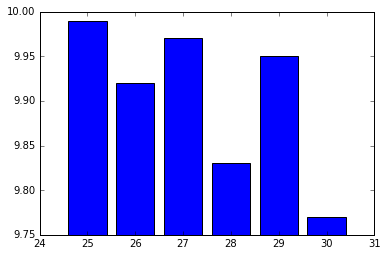

In [33]:
a=datosRDD.keys().collect()
b=datosRDD.values().collect()
grafica.bar(a,b,align="center")
grafica.ylim(9.75,10)
grafica.show()